In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In [117]:
X, y = make_circles(n_samples=1000)

In [118]:
# X, y = make_circles

In [119]:
ohe = OneHotEncoder(categories='auto')
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [120]:
print(y[:10])
print(y_hot[:10])

[1 1 0 0 0 1 0 0 0 0]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

## Generating seq Model

In [138]:
model = Sequential()
model.add(Dense(8, activation="tanh", input_shape=[X.shape[1]]))
model.add(Dense(8, activation="tanh"))
model.add(Dense(y_hot.shape[1], activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 18        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(optimizer="adam", loss=categorical_crossentropy)

In [140]:
model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
670/670 [==============================] - 1s 768us/step - loss: 0.7092
Epoch 2/100
670/670 [==============================] - 0s 73us/step - loss: 0.6985
Epoch 3/100
670/670 [==============================] - 0s 107us/step - loss: 0.6952
Epoch 4/100
670/670 [==============================] - 0s 89us/step - loss: 0.6932
Epoch 5/100
670/670 [==============================] - 0s 79us/step - loss: 0.6924
Epoch 6/100
670/670 [==============================] - 0s 182us/step - loss: 0.6918
Epoch 7/100
670/670 [==============================] - 0s 133us/step - loss: 0.6913
Epoch 8/100
670/670 [==============================] - 0s 90us/step - loss: 0.6903
Epoch 9/100
670/670 [==============================] - 0s 69us/step - loss: 0.6902
Epoch 10/100
670/670 [==============================] - 0s 60us/step - loss: 0.6906
Epoch 11/100
670/670 [==============================] - 0s 81us/step - loss: 0.6891
Epoch 12/100
670/670 [==============================] - 0s 68us/step - loss: 0.68

670/670 [==============================] - 0s 53us/step - loss: 0.4986
Epoch 99/100
670/670 [==============================] - 0s 58us/step - loss: 0.4927
Epoch 100/100
670/670 [==============================] - 0s 57us/step - loss: 0.4875


In [141]:
np.argmax(model.predict(X_test[:10]), axis=1)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [142]:
print(np.argmax(y_test[:10], axis=1))

[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [143]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = X.shape[0]
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    labels = np.argmax(labels, axis=1)

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    train_labels = np.argmax(train_labels, axis=1)
    
    mapped = np.asarray((np.argmax(y, axis=1))).reshape(-1)
    
    print(mapped.shape)
    
    ax.scatter(X[:,0], X[:,1], c=mapped, cmap=cmap, lw=0)
    
    return fig, ax

(330,)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a8d0e48>)

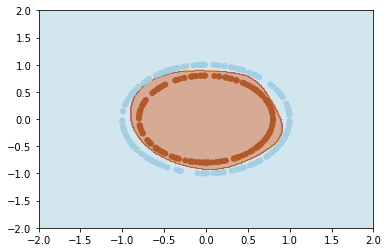

In [144]:
plot_decision_boundary(X_test, y_test, model)